In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [10]:
results_dir = r'../results'
filenames = os.listdir(results_dir)
print(filenames)
df = pd.read_csv(os.path.join(results_dir, filenames[1]))
df['Log2ArraySize'] = np.log2(df['ArraySize'])
df

['results_old_openmp.csv', 'results_openmp.csv']


,Threads,ArraySize,Time,Log2ArraySize
0,1,65536,0.004808,16.0
1,1,65536,0.004765,16.0
2,1,65536,0.004852,16.0
3,1,131072,0.009983,17.0
4,1,131072,0.009982,17.0
...,...,...,...,...
220,12,536870912,21.361763,29.0
221,12,536870912,19.244858,29.0
222,12,1073741824,40.610783,30.0
223,12,1073741824,40.077426,30.0


In [11]:
grouped = df.groupby(['Threads', 'ArraySize']).agg({
    'Time': ['mean', 'std']
}).reset_index()
grouped['Log2MatrixSize'] = np.log2(grouped['ArraySize'])
grouped['Log2MatrixSize'] = grouped['Log2MatrixSize'].astype(int)
grouped.columns = ['Threads', 'ArraySize', 'MeanTime', 'StdTime', 'Log2MatrixSize']
#grouped = grouped[grouped['Log2MatrixSize'] > 4]
grouped

,Threads,ArraySize,MeanTime,StdTime,Log2MatrixSize
0,1,65536,0.004808,0.000044,16
1,1,131072,0.009886,0.000168,17
2,1,262144,0.021487,0.000211,18
3,1,524288,0.045823,0.000631,19
4,1,1048576,0.091337,0.002128,20
...,...,...,...,...,...
70,12,67108864,2.426422,0.093744,26
71,12,134217728,5.225344,0.048966,27
72,12,268435456,9.890270,0.436580,28
73,12,536870912,19.897487,1.270590,29


In [12]:
#grouped.to_csv('table.csv')

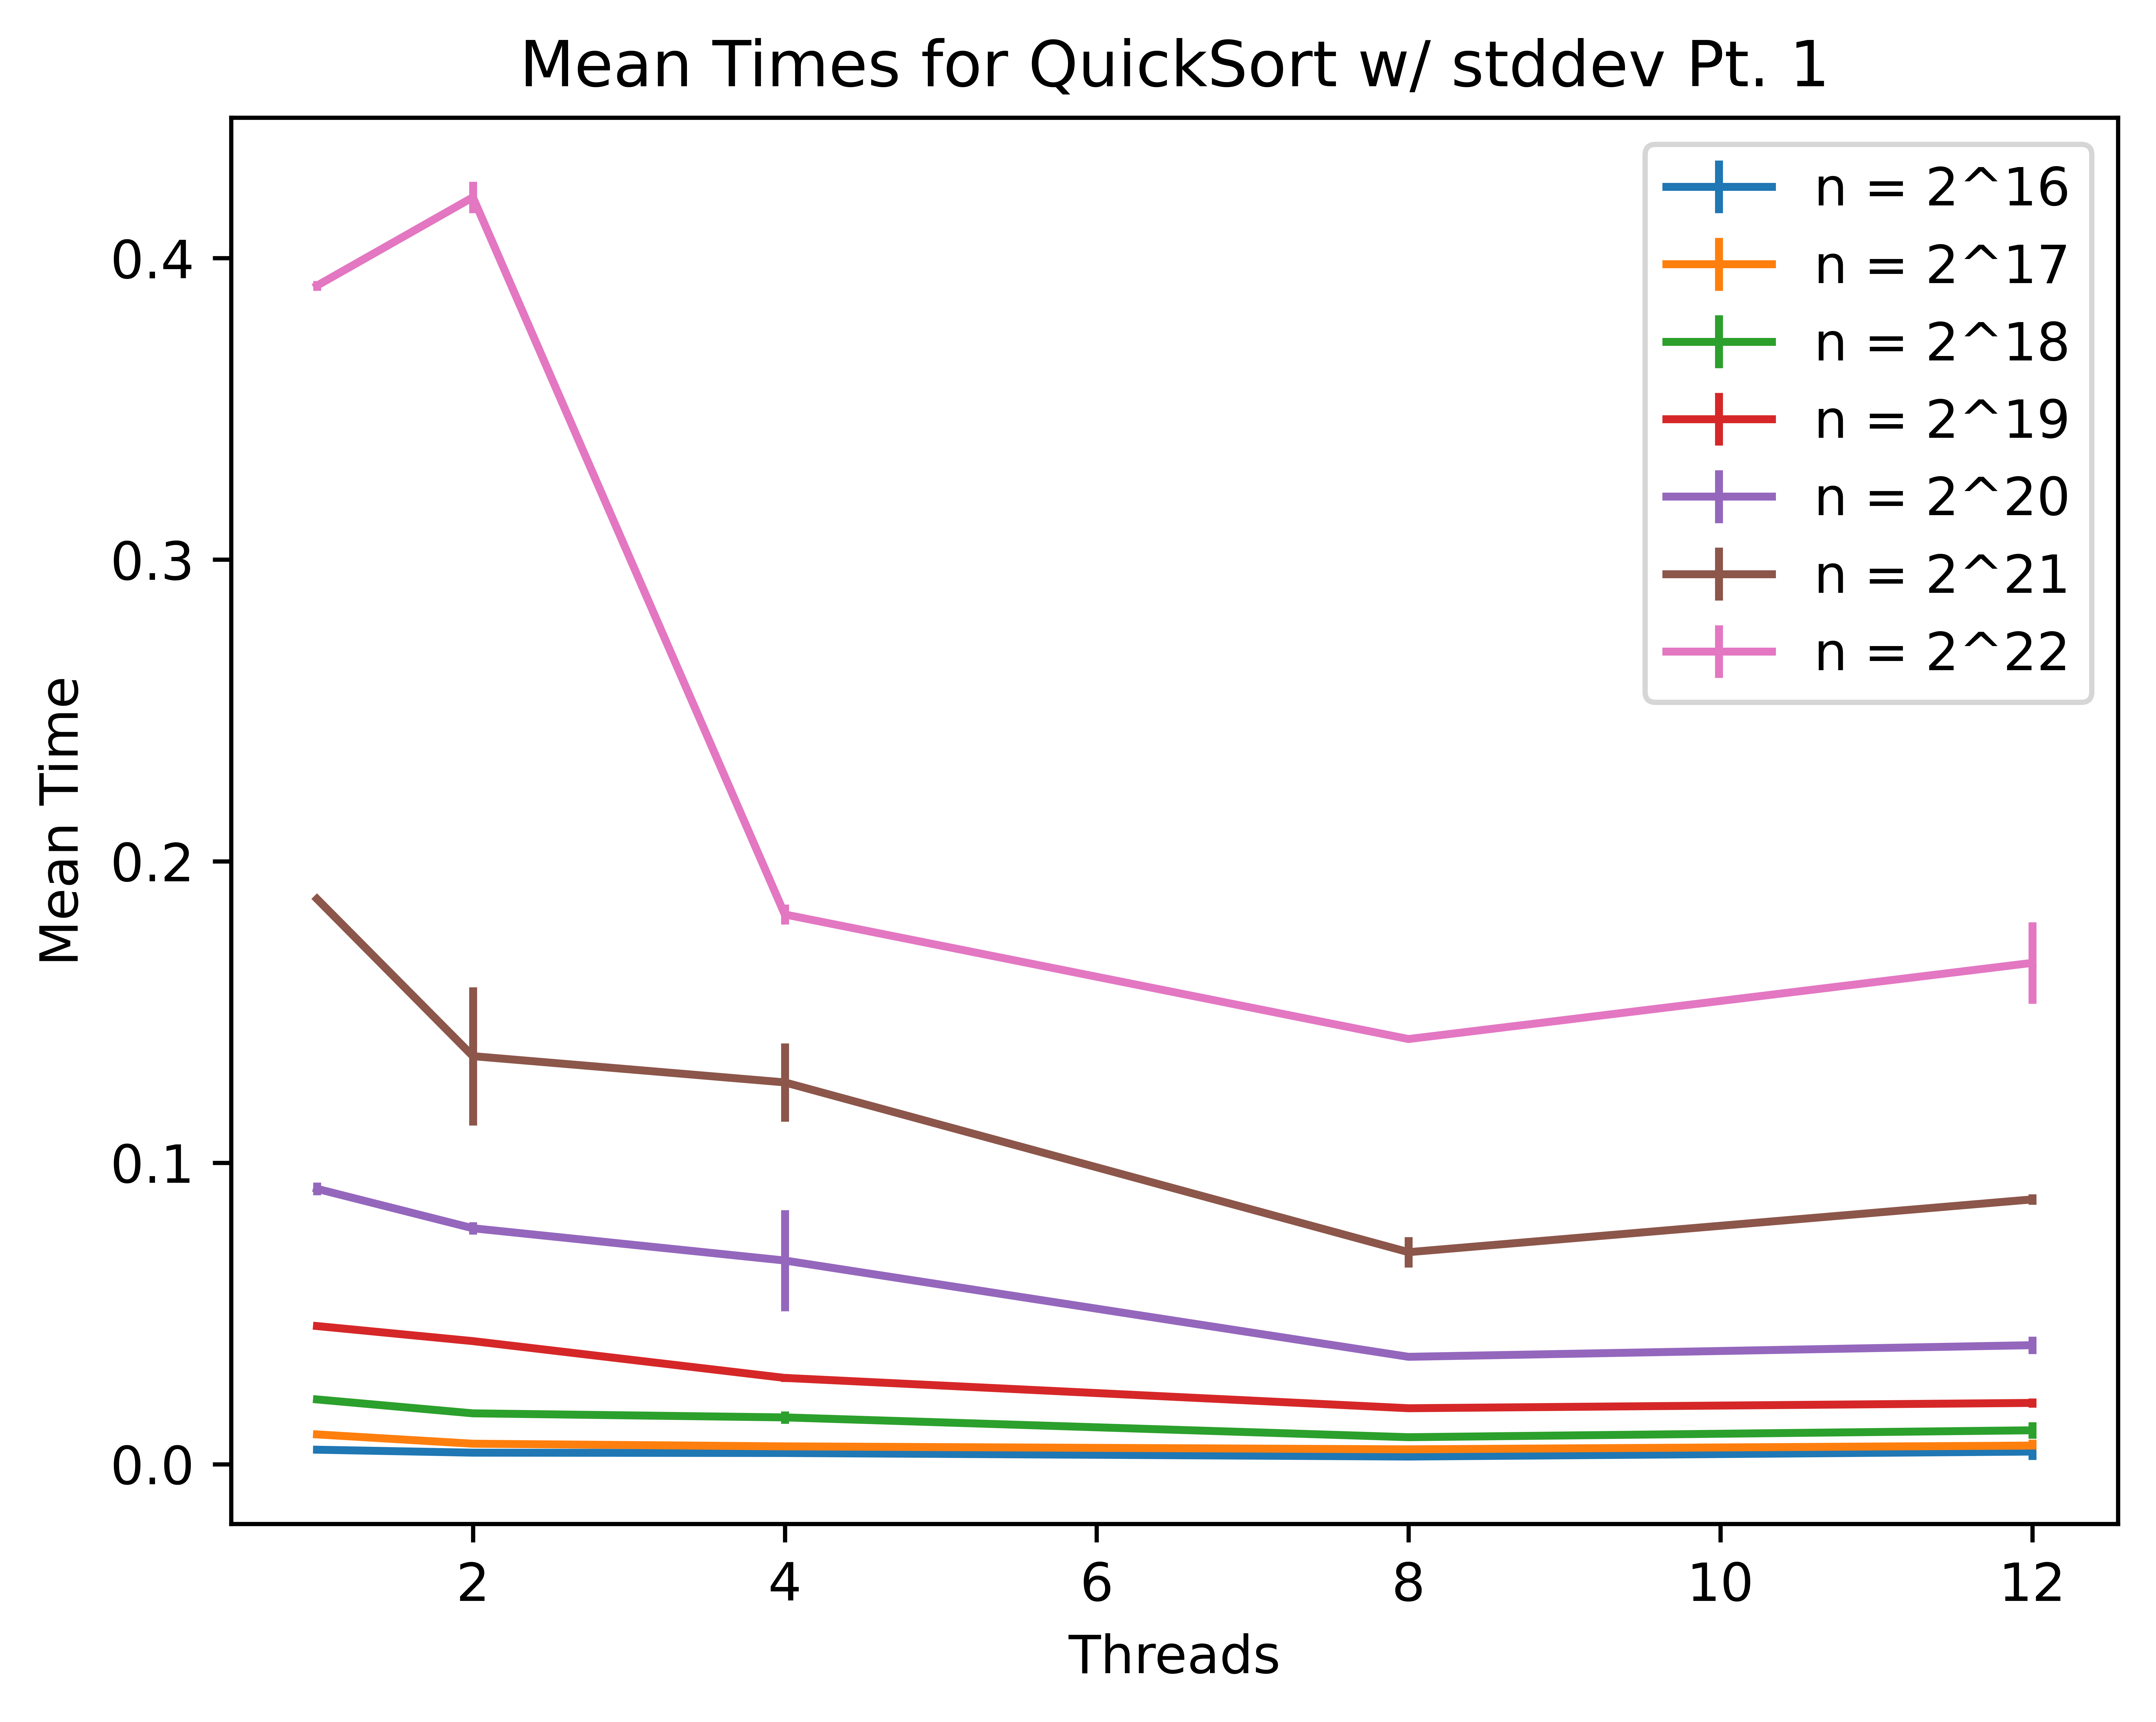

In [18]:
least = 16
most = 30
mid = (least + most) // 2
plt.figure(dpi=1200)

for i in range(least, mid):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    #print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], yerr=temp['StdTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")

plt.title(f"Mean Times for QuickSort w/ stddev Pt. 1")
plt.legend(loc='upper right')
plt.savefig('results1.png')
plt.show()

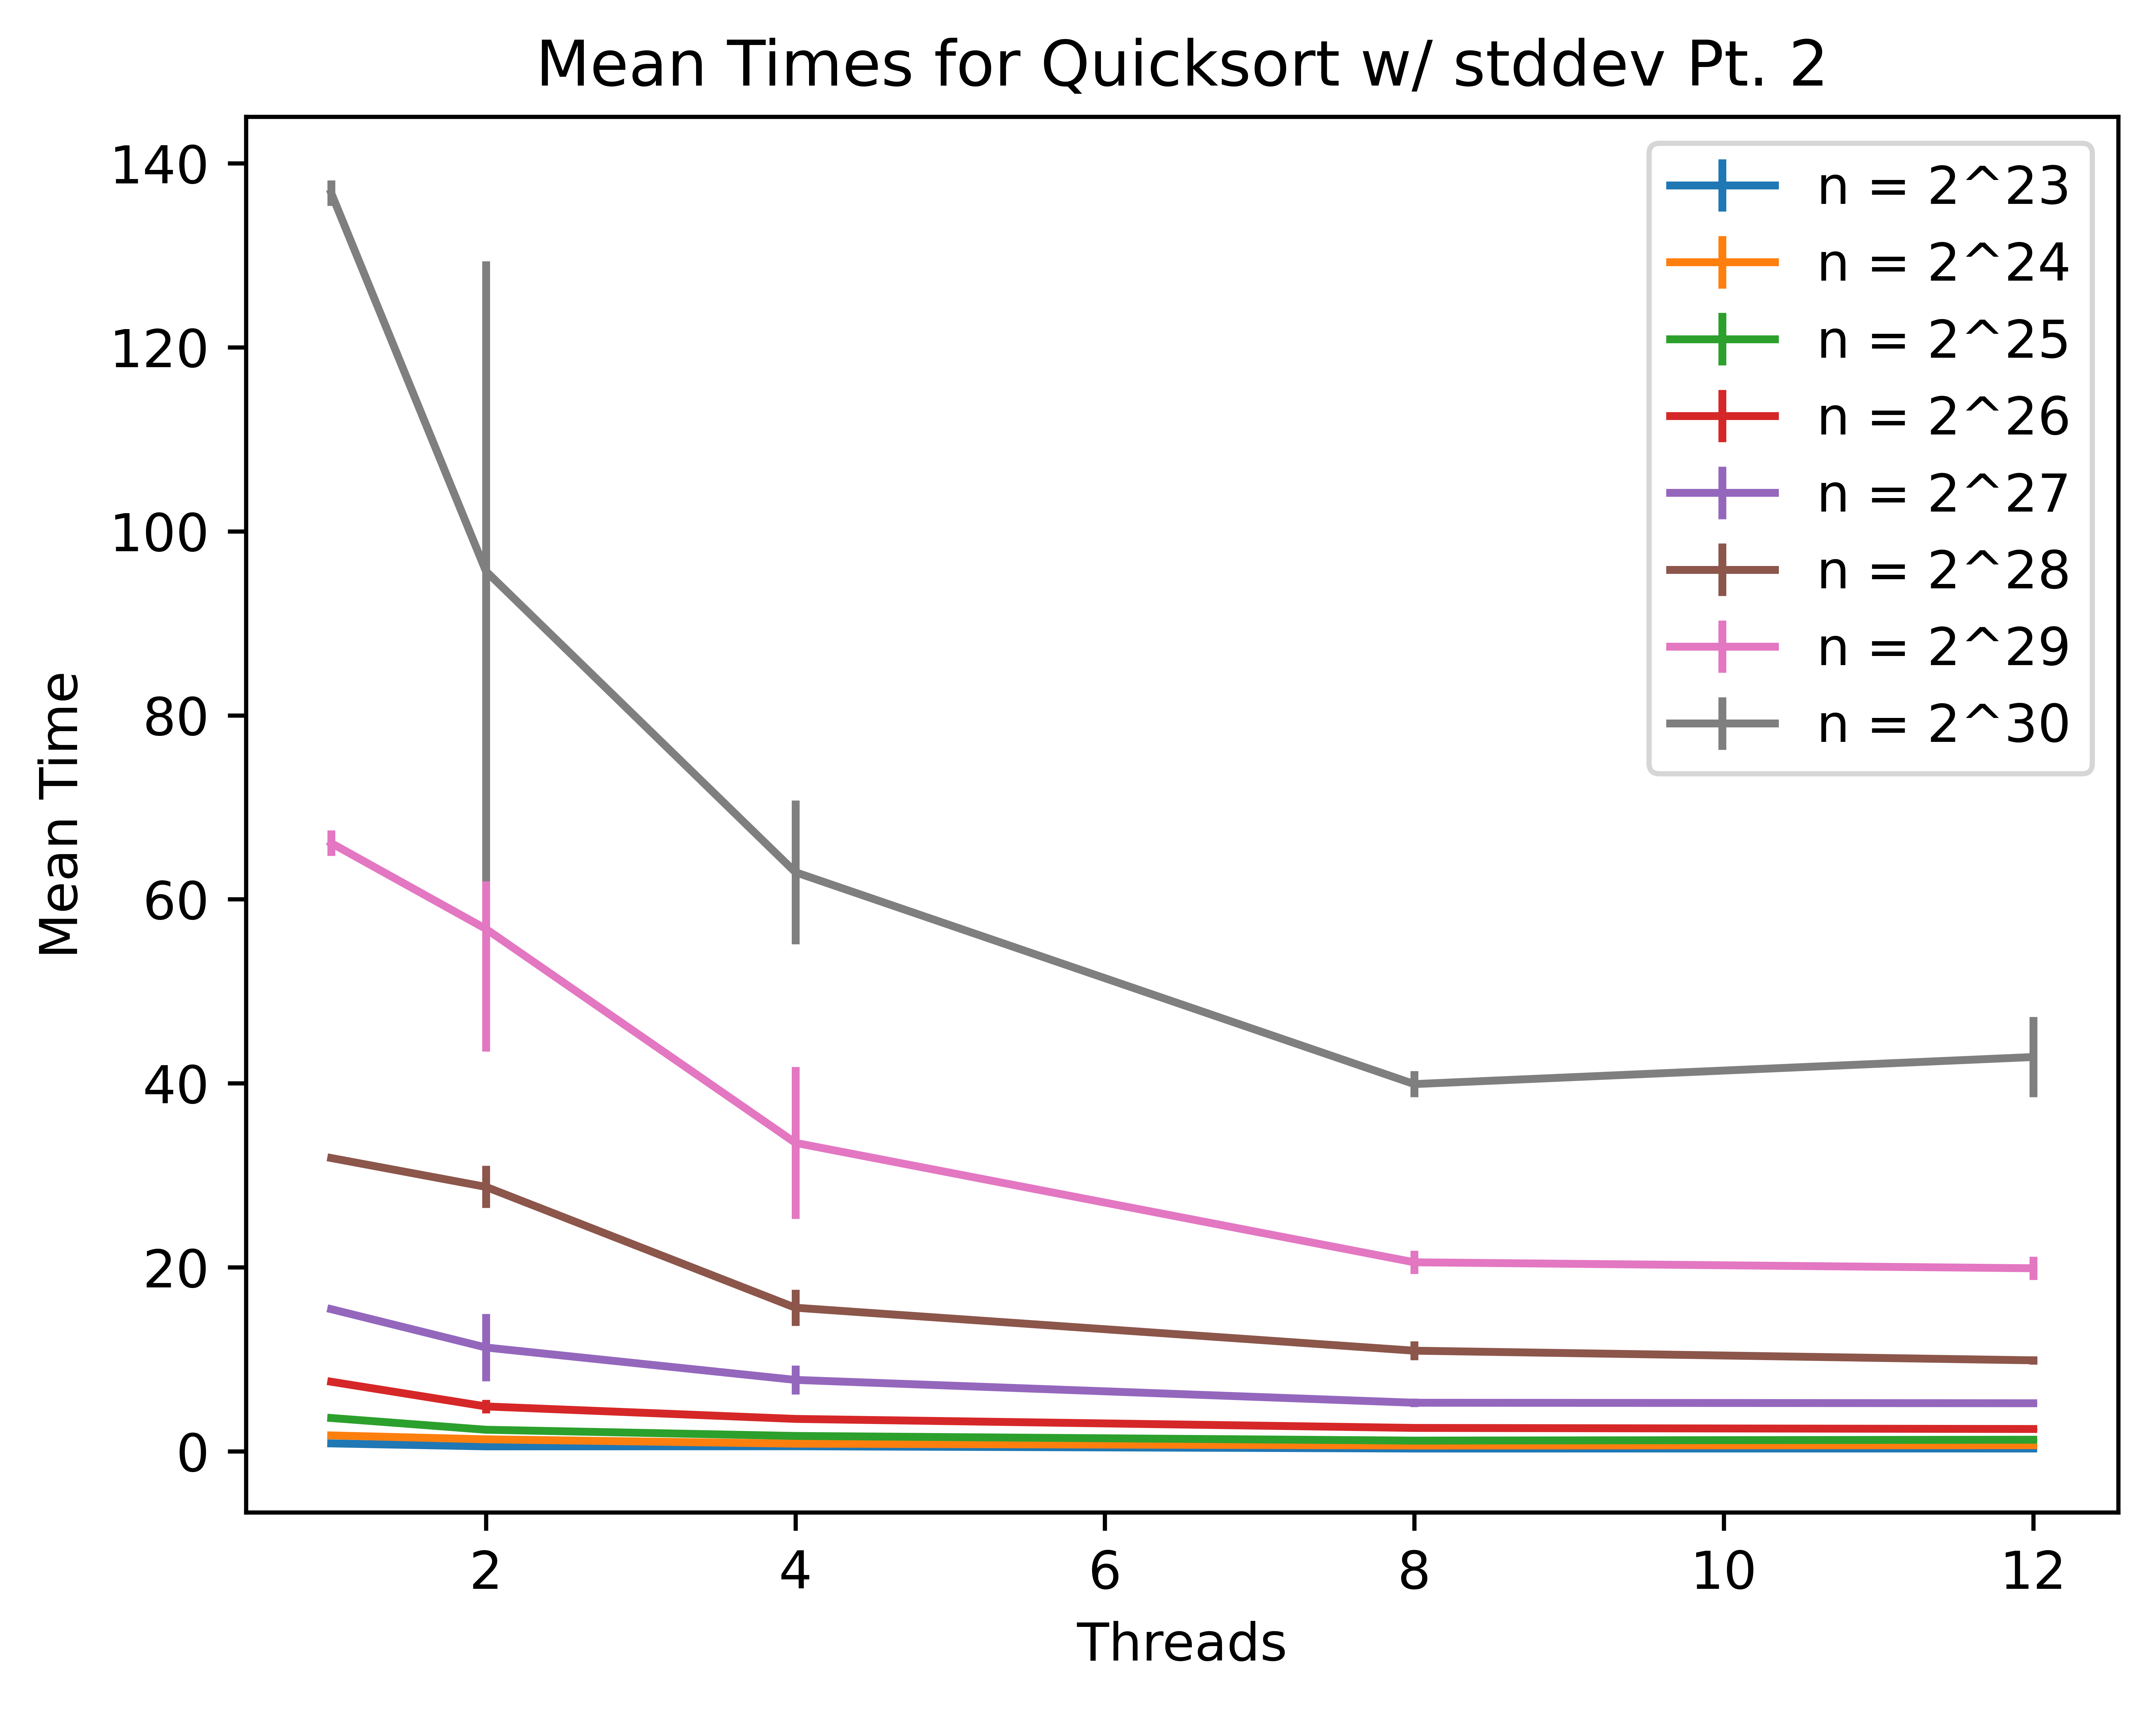

In [19]:
plt.figure(dpi=1200)

for i in range(mid, most+1):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    #print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], yerr=temp['StdTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")
plt.title(f"Mean Times for Quicksort w/ stddev Pt. 2")
plt.legend(loc='upper right')
plt.savefig('results2.png')
plt.show()